<a href="https://colab.research.google.com/github/datagroundr4/dataanalysis/blob/main/market_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importamos librerías y cargamos nuestro dataset

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df_market = pd.read_csv('https://drive.google.com/uc?export=download&id=1Ykgqrmt7eldMOaEwFoXVe8WYaPl6ylWp')
df_market.head()

,visitas_ultimos_30d,compras,gasto_publicitario_dirigido,puntuacion_satisfaccion,edad_cliente,estado_suscripcion,region,tipo_dispositivo,ingresos_mensuales
0,12,1,26.75,4.2,37.0,Yes,North,mobile,34.59
1,6,0,0.00,2.8,35.0,No,North,mobile,0.00
2,11,1,31.11,3.1,43.0,Yes,North,mobile,25.35
3,14,2,29.74,2.7,29.0,No,North,mobile,38.14
4,7,1,46.61,2.8,34.0,No,East,desktop,24.25


<p>Ahora vamos a usar <code>.info()</code> para examinar el tipo de cada una de nuestras variables y entender mejor nuestros datos:</p>

In [6]:
df_market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   visitas_ultimos_30d          1500 non-null   int64  
 1   compras                      1500 non-null   int64  
 2   gasto_publicitario_dirigido  1500 non-null   float64
 3   puntuacion_satisfaccion      1500 non-null   float64
 4   edad_cliente                 1500 non-null   float64
 5   estado_suscripcion           1500 non-null   object 
 6   region                       1500 non-null   object 
 7   tipo_dispositivo             1500 non-null   object 
 8   ingresos_mensuales           1500 non-null   float64
dtypes: float64(4), int64(2), object(3)
memory usage: 105.6+ KB


<p>Claramente podemos ver el tipo de cada unos de nuestros datos, hacer algunas reflexiones relevantes:</p>
<p>Aquí es donde entra nuestro pensamiento analítico, a primera vista podríamos pensar que existe una relación entre la cantidad de inversión publicitaria y los ingresos mensuales, sin embargo el gasto publicitario no genera ingresos directamente, lo hace vía:</p>
<ul>
<li>Visitas</li>
<li>Compras</li>
<li>Retención</li>
</ul>
<p>Hay mucho ruido estructural, porque puede haber clientes que miran anuncios y no compran, clientes que compran sin publicidad.</p>

## Enfoque recomendado
<p>Podríamos pensar que ¿mientras más visitas tenga nuestro portal de e-commerce suben los ingresos mensuales?</p>
<p>Éste es un excelente enfoque porque:</p>
<ul>
<li>Vemos una relación directa y comprensible.</li>
<li>Ambas variables son continuas</li>
<li>Hay menos capas intermedias</li>
<li>Es muy clara visualemnte para verlo en un gráfico de dispersión</li>
<p>Entonces: ¿Los clientes que visitan más, generalmente genera más ingresos?</p>

<p>Ahora vamos a visualizar un gráficode dispersión con nuestros datos:</p>
<ul>
<li>Primero vamos a limpiar nuestros datos para tenr solamente filas con ingresos positivos</li>
<li>Luego vamos a crear el gráfico</li>
</ul>

In [13]:
df_mrkt_clean = df_market[df_market['ingresos_mensuales'] > 0]

<p>Ahora tenemos una visoón clara sobre el fenómeno que queremos indagar. Porqué eliminamos los ingresos = 0 de nuestrso datos? Ingresos = 0 puede significar varias cosas diferentes:</p>
<ul>
<li>Un cliente que visitó y nunca compró</li>
<li>Abandonó la suscripción</li>
<li>Hubo un error de medición</li>
</ul>
<p>No representan menos ingresos, representan un fenómeno distinto al que estamos estudiando</p>

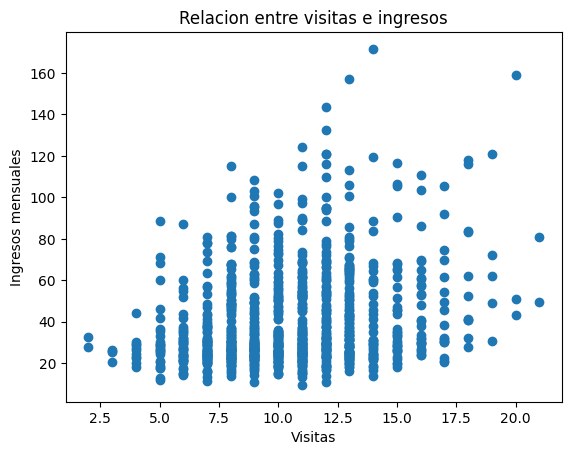

In [14]:
plt.figure()
plt.scatter(df_mrkt_clean['visitas_ultimos_30d'], df__mrkt_clean['ingresos_mensuales'])
plt.xlabel('Visitas')
plt.ylabel('Ingresos mensuales')
plt.title('Relacion entre visitas e ingresos')
plt.show()

<p>Ahora miremos éste gráfico, no estmoas buscando una ecuación ni una tendencia general, cada punto es un cliente.</p>
<ul>
<li>Más a la derecha = más visitas</li>
<li>Más arriba = más ingresos.</li>
</ul>
<p>La pregunta no es si todos los puntos siguen una línea perfecta, la pregunta es: <b>¿Si nos movemos a la derecha tendemos a subir?</b></p>
<p>Si la respuesta es "si, en general", entonces tenemos una correlación postiva</p>
<p>Por lo tanto podemos decir que: "La correlación no exige un orden perfecto, simplemente exige <b>consistencia en la dirección del movimiento</b></p>

# Coeficiente de Pearson (relación lineal)
<p>Pearson pregunta: ¿cuando x aumenta, y aumenta de forma más o menos recta?<p>

In [15]:
pearson_coef = df_mrkt_clean[['visitas_ultimos_30d', 'ingresos_mensuales']].corr(method='pearson')

<p>Extraemos el valor de la primera fila y segunda columna de ésta matrix para obtener nuestro valor de interés.</p>

In [10]:
pearson_coef.iloc[0, 1]

np.float64(0.24781118469000094)

# Coeficiente de Spearman (relación monotónica)
<p>Spearman pregunta algo más simple: ¿cuando x aumenta, y tiende a aumentar, aunque no sea en línea recta?</p>

In [16]:
spearman_coef = df_mrkt_clean[['visitas_ultimos_30d', 'ingresos_mensuales']].corr(method='spearman')

<p>Extraemos el valor de la primera fila y segunda columna de ésta matrix para obtrener nuestro valor de interés.</p>

In [19]:
spearman_coef.iloc[0, 1]

np.float64(0.22716546965183246)

## Explicación intuitiva
<p>Un coeficiente de Pearson de 0.25 y uno de Spearman de 0.23 indican que si existe una relación positiva poero es débil.</p>
<p>Cunado una variable aumenta, la otra tiende a aumentar pero el patrón es incosistente y con mucho ruido.</p>
<p>Un 0.25 no significa que la una variable controle a la otra, significa que empuja ligeramente la tendencia pero no la domina</p>
<p>De forma práctica, valores cercanos a 0.7 o 0.8 indican una relación fuerte, valores alrededor de 0.3 indican relaciones fuertes pero reales</p>
<p>Con 0.25, si intentamos predecir ingresos usando sólo ésta variable fallaremos muchas veces</p>

# Ejecicio práctico
<p>Ahora vamos a utilizar otras variable numéricas de nuestro dataset para realizar éste análisis, podríamos inicialmente filtrar nuetros datos para usar solamente la información de los clientes que mantienen una suscripción activa y analizar entonces la correlación entre inversión publicitaria e ingresos mensuales.</p>